In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 6s 14ms/step - loss: 0.6965 - accuracy: 0.0032 - val_loss: 0.6963 - val_accuracy: 0.0029
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6962 - accuracy: 0.0033 - val_loss: 0.6960 - val_accuracy: 0.0026
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6959 - accuracy: 0.0033 - val_loss: 0.6957 - val_accuracy: 0.0024
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6956 - accuracy: 0.0029 - val_loss: 0.6954 - val_accuracy: 0.0025
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6953 - accuracy: 0.0027 - val_loss: 0.6951 - val_accuracy: 0.0024
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6951 - accuracy: 0.0020 - val_loss: 0.6949 - val_accuracy: 0.0025
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6948 - accuracy: 0.0025 - val_loss: 0.6947 - val_accuracy: 0.0025
E

In [5]:
# 1. Add more hidden layer to autoencoder

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded1 = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(2*encoding_dim, activation='relu')(encoded1)
decoded1 = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded1)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

In [6]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
history1=autoencoder1.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.6947 - accuracy: 0.0018 - val_loss: 0.6946 - val_accuracy: 0.0022
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6946 - accuracy: 0.0015 - val_loss: 0.6946 - val_accuracy: 0.0021
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6945 - accuracy: 0.0018 - val_loss: 0.6945 - val_accuracy: 0.0022
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6945 - accuracy: 0.0017 - val_loss: 0.6944 - val_accuracy: 0.0022
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6944 - accuracy: 0.0019 - val_loss: 0.6943 - val_accuracy: 0.0022
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6943 - accuracy: 0.0017 - val_loss: 0.6942 - val_accuracy: 0.0022
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6942 - accuracy: 0.0015 - val_loss: 0.6942 - val_accuracy: 0.0022
Epoc

In [8]:
# 2. Do the prediction on the test data and then visualize one of the reconstructed version of 
# that test data.Also, visualize the same test data before reconstructionusing Matplotlib
prediction = autoencoder1.predict(x_test[[0],:])

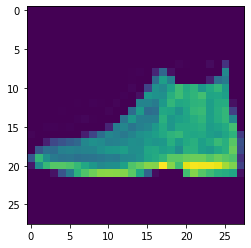

In [9]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0].reshape(28,28))
plt.show()

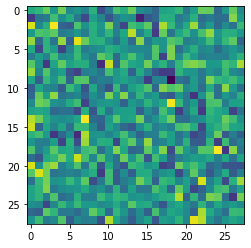

In [10]:
plt.imshow(prediction[0].reshape(28,28))
plt.show()

In [11]:
# 3. Repeat the question 2 on the denoisening autoencoder
#introducing noise
#Add Noise to our MNNIST Dataset by sampling random values from Gaussian distribution by using np.random.normal() 
#and adding it to our original images to change pixel values
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [12]:
history2=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6947 - accuracy: 0.0012 - val_loss: 0.6947 - val_accuracy: 0.0017
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6946 - accuracy: 0.0012 - val_loss: 0.6946 - val_accuracy: 0.0016
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6945 - accuracy: 0.0012 - val_loss: 0.6945 - val_accuracy: 0.0016
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6945 - accuracy: 0.0012 - val_loss: 0.6944 - val_accuracy: 0.0016
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6944 - accuracy: 0.0012 - val_loss: 0.6943 - val_accuracy: 0.0014
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6943 - accuracy: 0.0012 - val_loss: 0.6942 - val_accuracy: 0.0014
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6942 - accuracy: 0.0012 - val_loss: 0.6942 - val_accuracy: 0.0014
Epoch

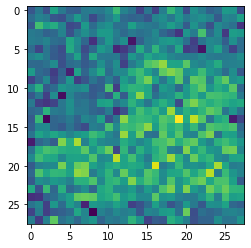

In [13]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [14]:
prediction1 = autoencoder1.predict(x_train_noisy[[0],:])

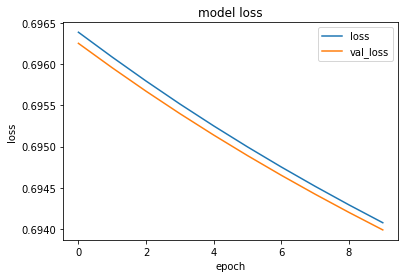

In [15]:
# 4.plot lossand accuracy using the history object

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.show()


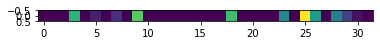

In [16]:
# Bonus task

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)



encoder = Model(input_img, encoded)

encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_imgs = encoder.predict(x_test[[0],:])

from matplotlib import pyplot as plt
plt.imshow(encoded_imgs)
plt.show()